In [ ]:
import cv2
import os
import sys
import json
import matplotlib.pyplot as plt
import numpy as np

ROOT_DIR = os.path.abspath(os.path.join('../../../'))
print('Root directory:',ROOT_DIR)
sys.path.append(ROOT_DIR)
sys.path.append(os.path.abspath(os.path.join('../..')))

from bep.utils import load_train_val_datasets

figsize = 25
image_count = 1
threshold = 2000

Root directory: c:\Users\abell\Documents\aa_delft\J4\BEP\ai


In [10]:
_, _, data = load_train_val_datasets(ROOT_DIR)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


**Original Image**

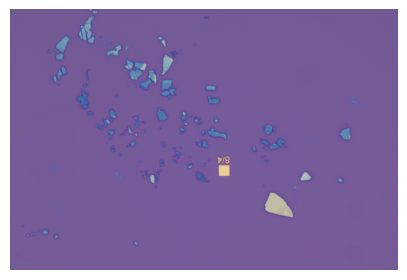

In [11]:
image_id = 2
border = 10

image = cv2.imread(data.image_info[image_id]['path'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')
plt.show()


**Only bbox with color background**

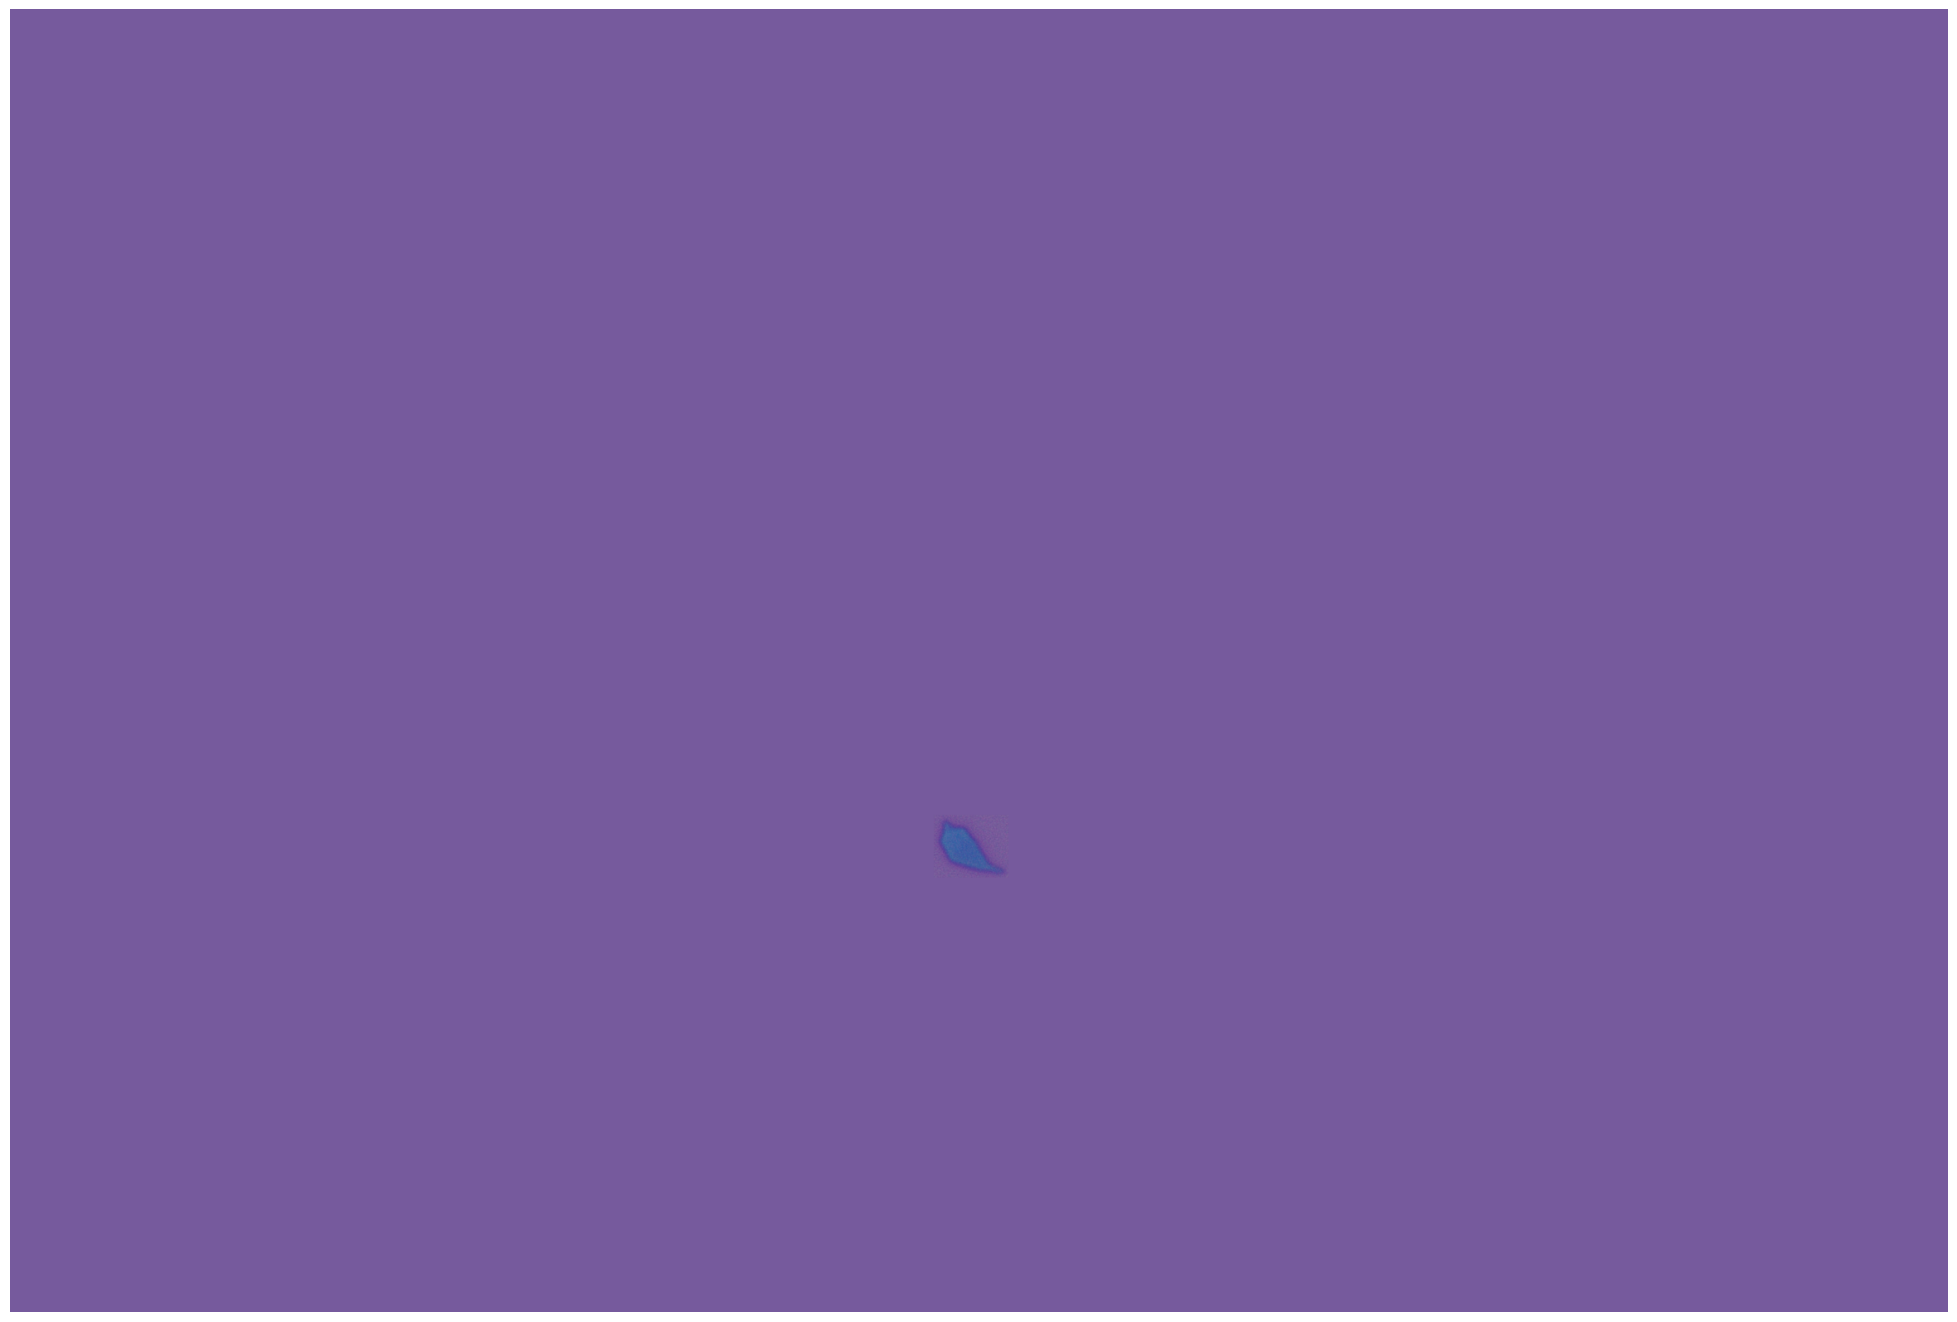

True

In [21]:
image_id = 2
border = 10

image = cv2.imread(data.image_info[image_id]['path'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

background_color = (118, 90, 157)

for idx, annotation in enumerate(data.image_info[image_id]['annotations']):
    bbox = annotation['bbox']

    x, y, w, h = [int(i) for i in bbox]
    flake_image = np.full_like(image, background_color)


    flake_image[y-border:y+h+border, x-border:x+w+border] = image[y-border:y+h+border, x-border:x+w+border]
    plt.figure(figsize=(figsize, figsize))
    plt.imshow(flake_image)
    plt.axis('off')  # Hide axis
    plt.show()

    if idx >= image_count - 1:
        break

cv2.imwrite(os.path.join(ROOT_DIR, 'data', 'images', 'syn', 'cropped_purple_bg.png'), cv2.cvtColor(flake_image, cv2.COLOR_RGB2BGR))

**Create background**

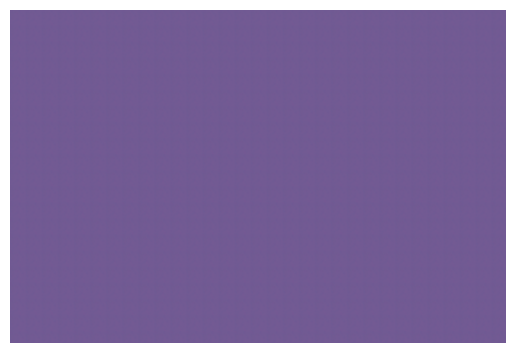

In [29]:
sample_image_path = os.path.join(ROOT_DIR, 'data', 'images', 'batch4', '67_sio2_NbSe2_Exfoliation_C5-84_f4_img.png')
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

square_size = 100
small_square = cv2.GaussianBlur(sample_image[:square_size, :square_size], (15,15), 0)

tile_height, tile_width = small_square.shape[:2]
num_tiles_y = image.shape[0] // tile_height + 1
num_tiles_x = image.shape[1] // tile_width + 1
tiled_background = np.tile(small_square, (num_tiles_y, num_tiles_x, 1))[:sample_image.shape[0], :sample_image.shape[1], :]
tiled_background = cv2.GaussianBlur(tiled_background, (11, 11), 0)

plt.figure()
plt.imshow(tiled_background)
plt.axis('off')
plt.show()

**Fill background with sample**

In [ ]:
annotation_json_format = {
    "info": {
        "year": 2024,
        "description": "",
        "version": 1.0,
        "date_created": "",
        "url": "tudelft.nl",
        "contributor": "Abel de Lange"
    }, 
    "categories": [
        {"id": 1, "name": "Mono_NbSe2"},
        {"id": 2, "name": "Few_NbSe2"},
        {"id": 3, "name": "Thick_NbSe2"}
    ], 
    "annotations": []
}

In [33]:
data.image_info[image_id]['annotations'][0]

{'id': 22,
 'image_id': '67_sio2_NbSe2_Exfoliation_C5-84_f4_img.png',
 'category_id': 2,
 'segmentation': [[1493.985,
   1294.84,
   1497.818,
   1298.173,
   1503.318,
   1304.007,
   1509.318,
   1304.507,
   1513.985,
   1303.34,
   1520.985,
   1307.173,
   1528.985,
   1314.84,
   1537.152,
   1324.507,
   1543.818,
   1334.34,
   1550.485,
   1345.173,
   1553.818,
   1352.673,
   1559.652,
   1359.507,
   1565.485,
   1364.34,
   1569.652,
   1367.507,
   1575.818,
   1368.173,
   1579.652,
   1371.507,
   1582.485,
   1374.84,
   1577.818,
   1375.507,
   1572.152,
   1375.34,
   1567.318,
   1373.507,
   1562.818,
   1371.84,
   1555.652,
   1371.84,
   1549.152,
   1370.84,
   1534.318,
   1368.007,
   1521.485,
   1365.173,
   1506.318,
   1361.59,
   1498.318,
   1354.59,
   1492.485,
   1345.923,
   1486.068,
   1335.007,
   1483.485,
   1328.173,
   1482.652,
   1323.507,
   1485.152,
   1317.673,
   1487.152,
   1312.84,
   1486.985,
   1307.84,
   1486.818,
   1302.507,

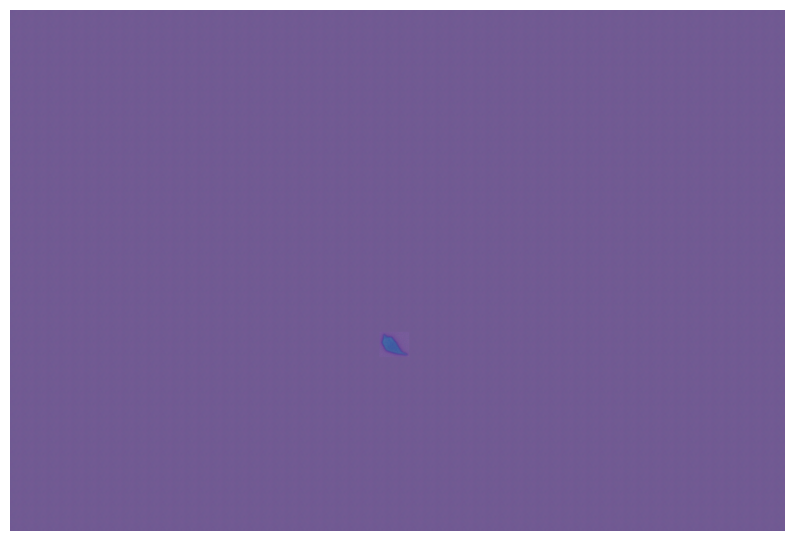

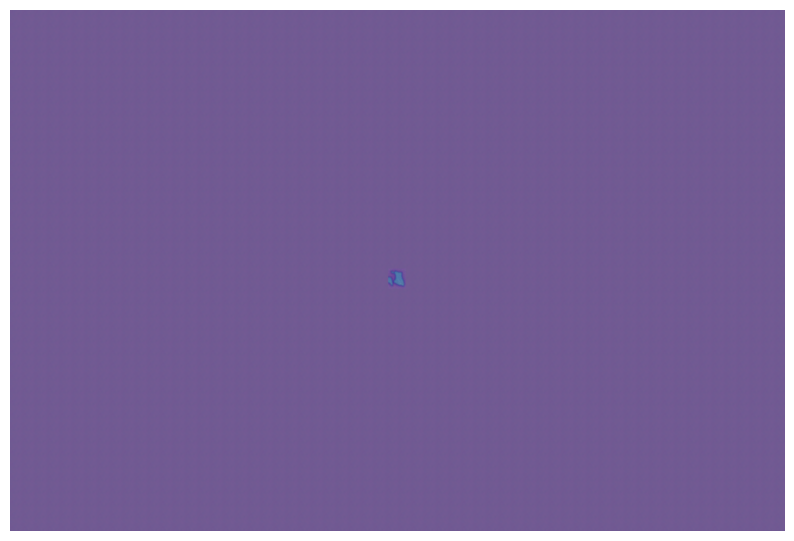

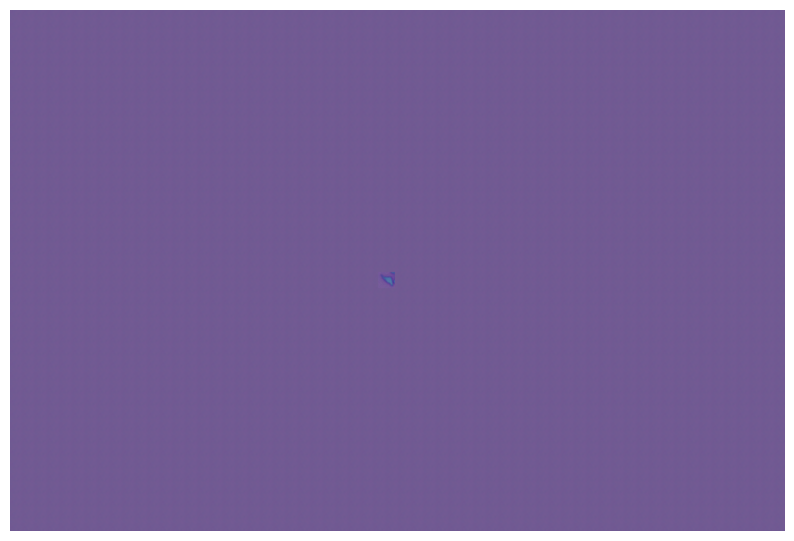

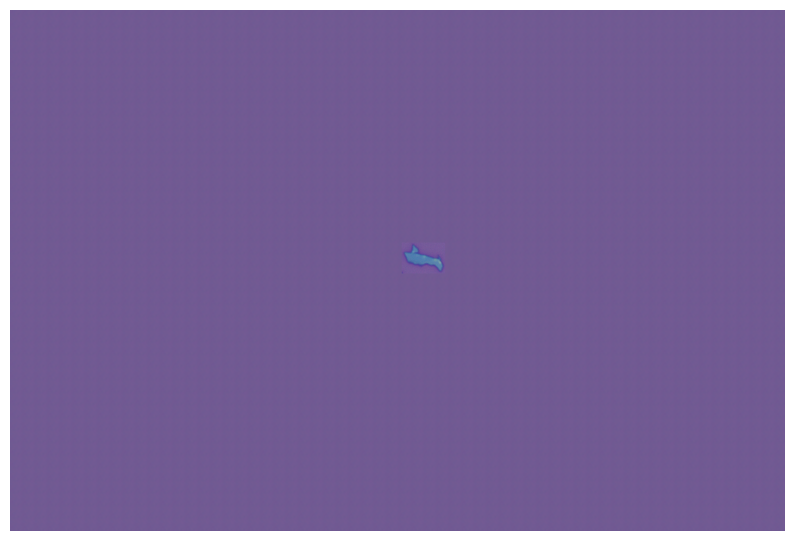

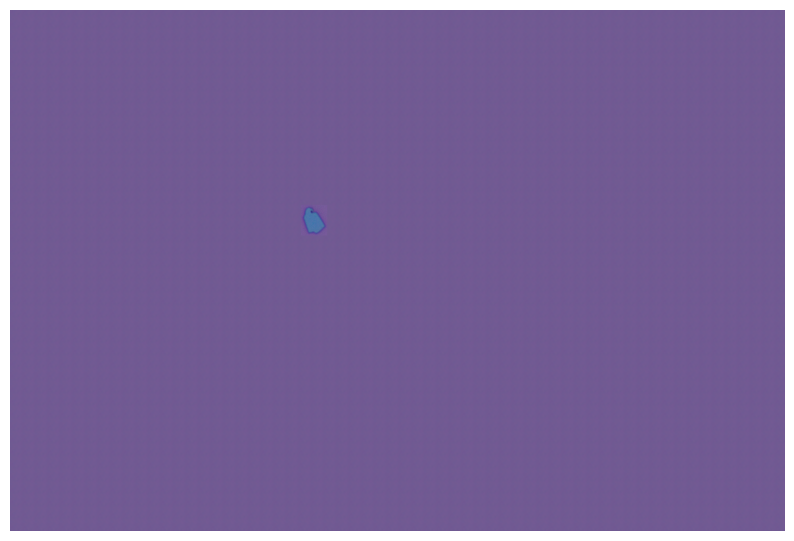

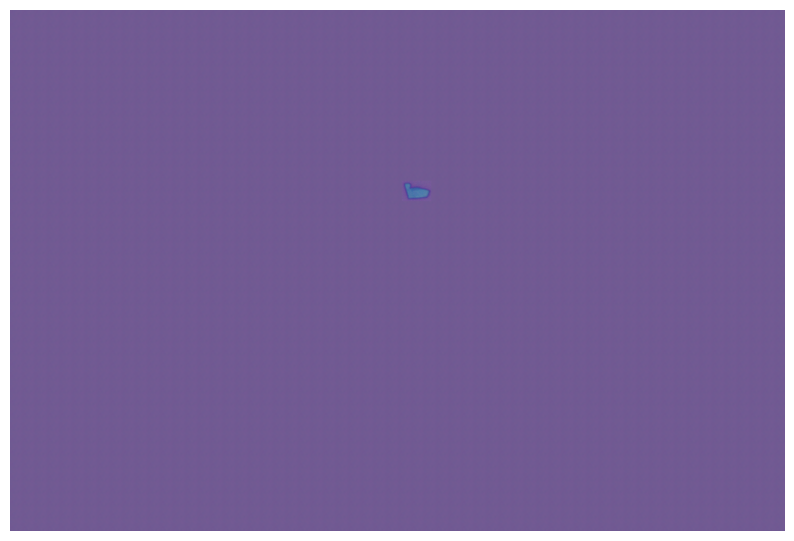

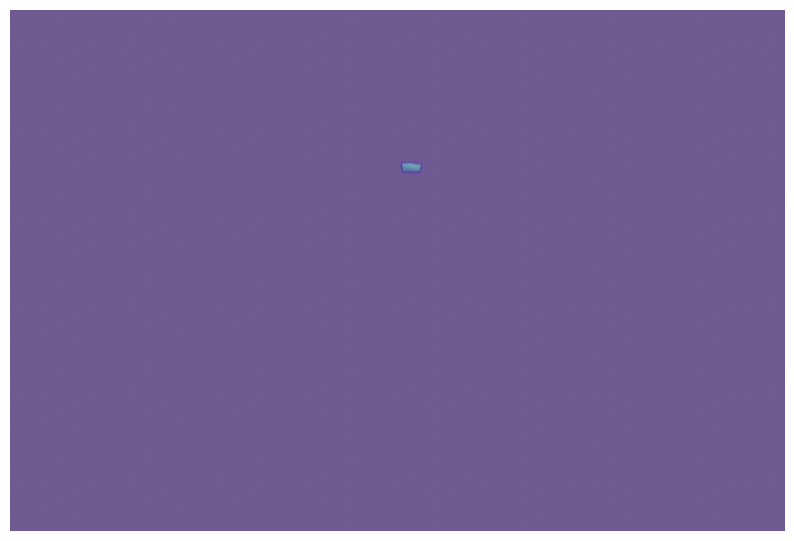

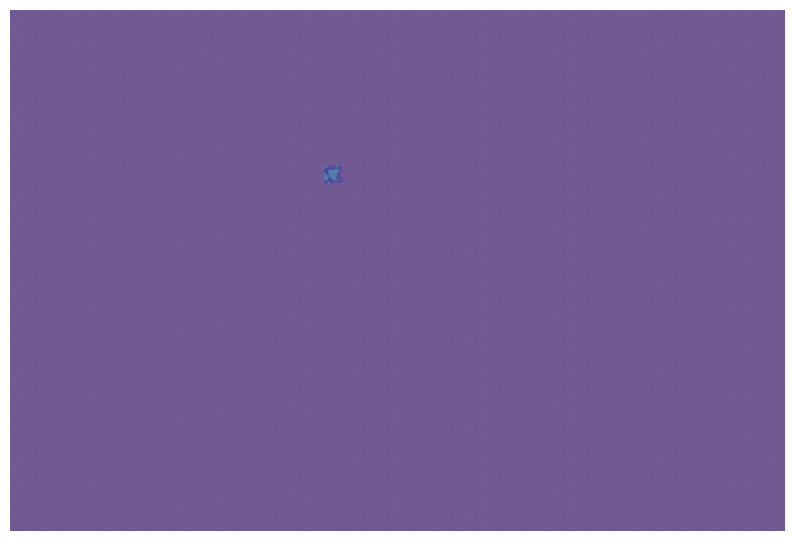

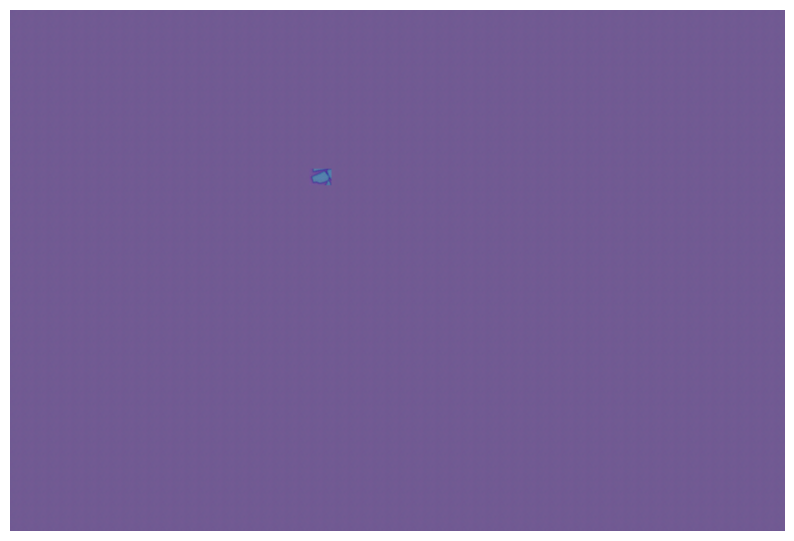

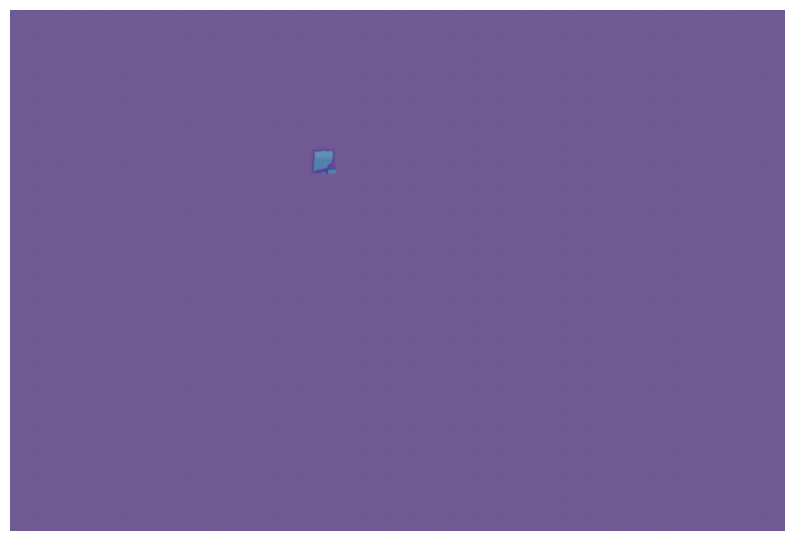

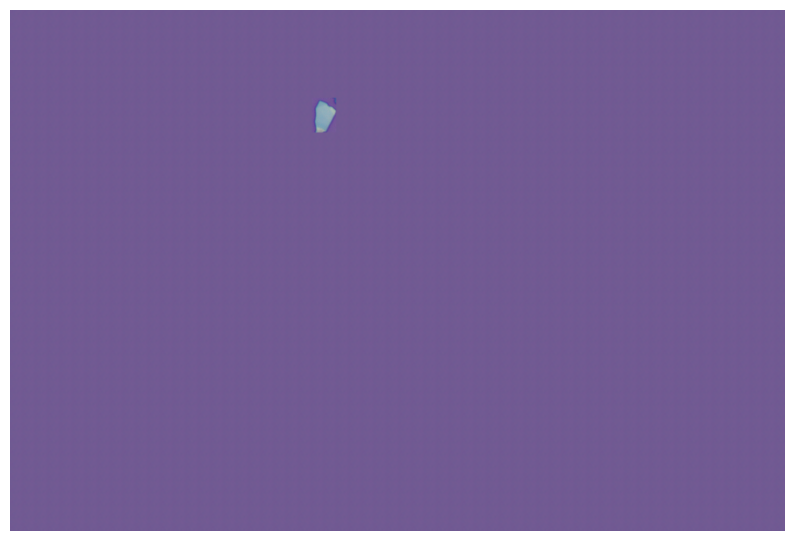

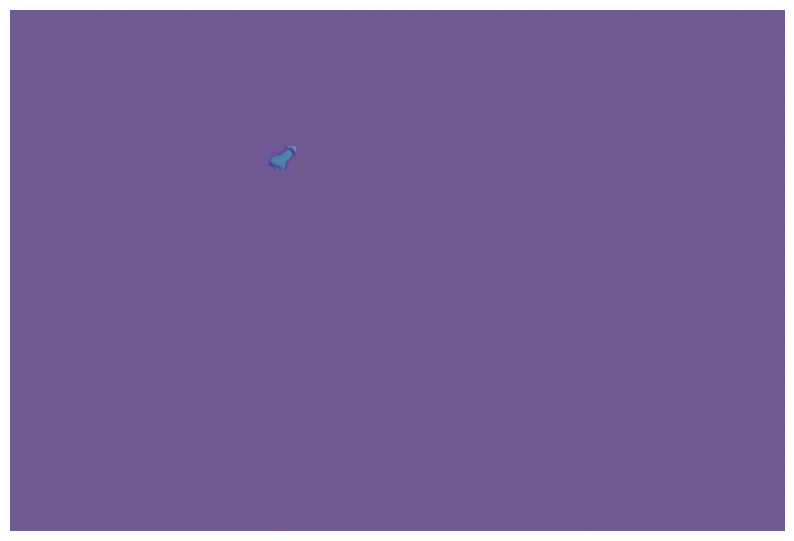

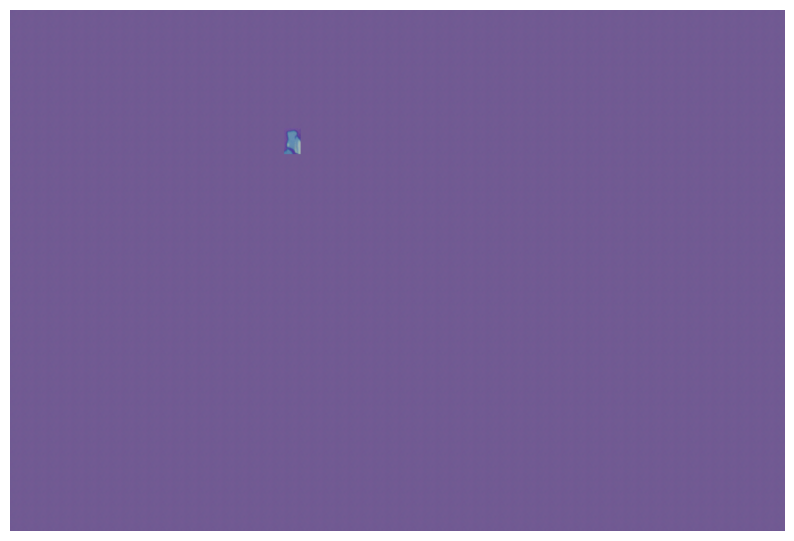

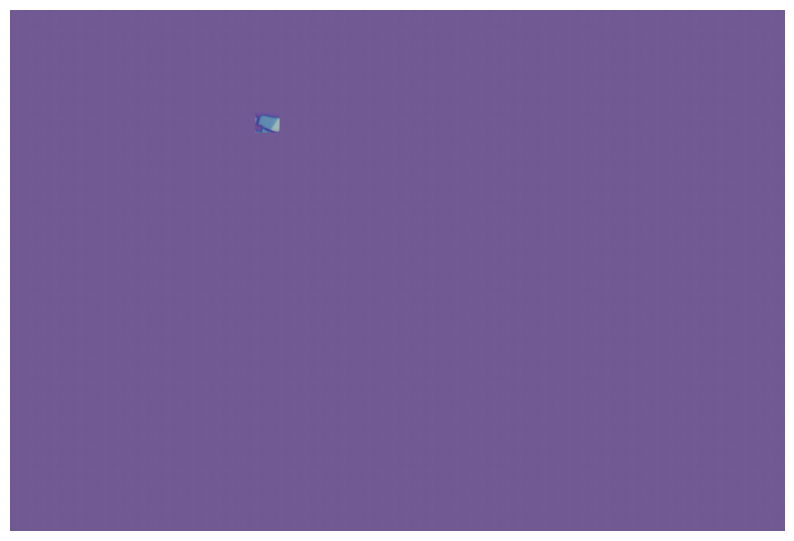

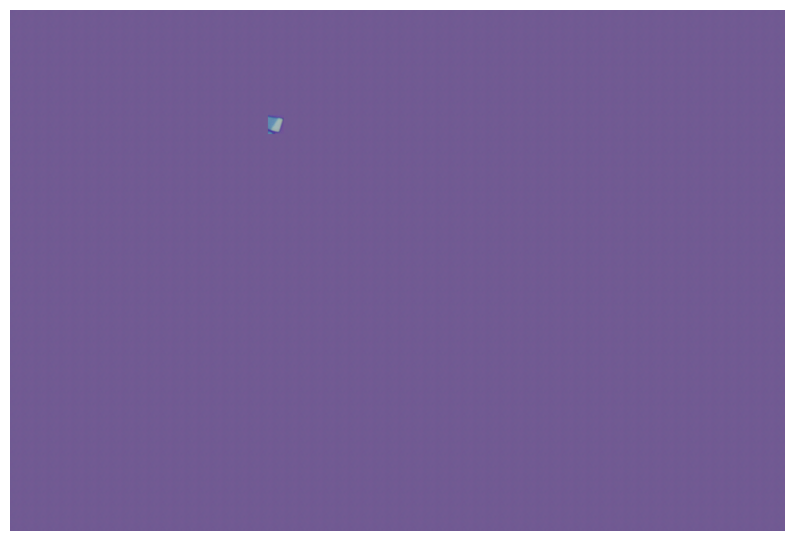

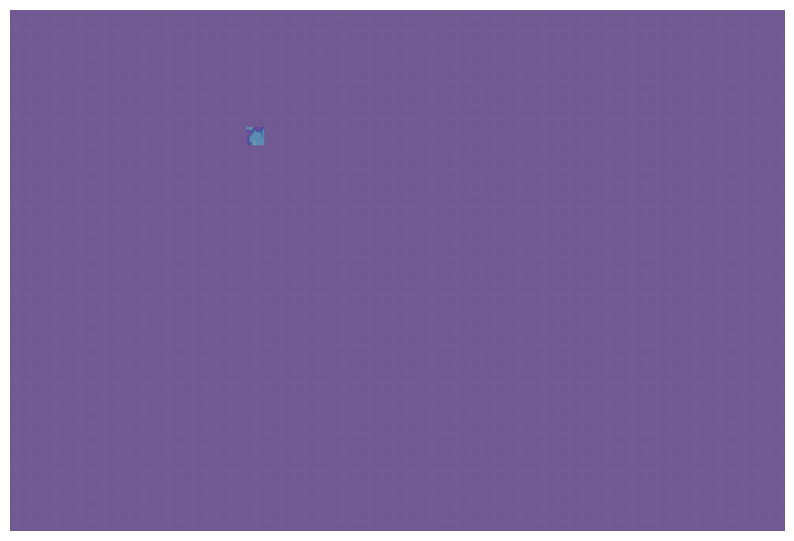

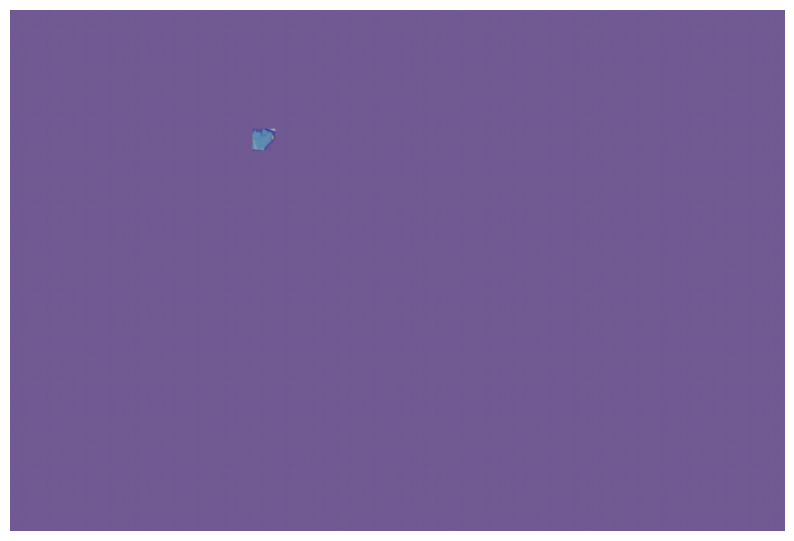

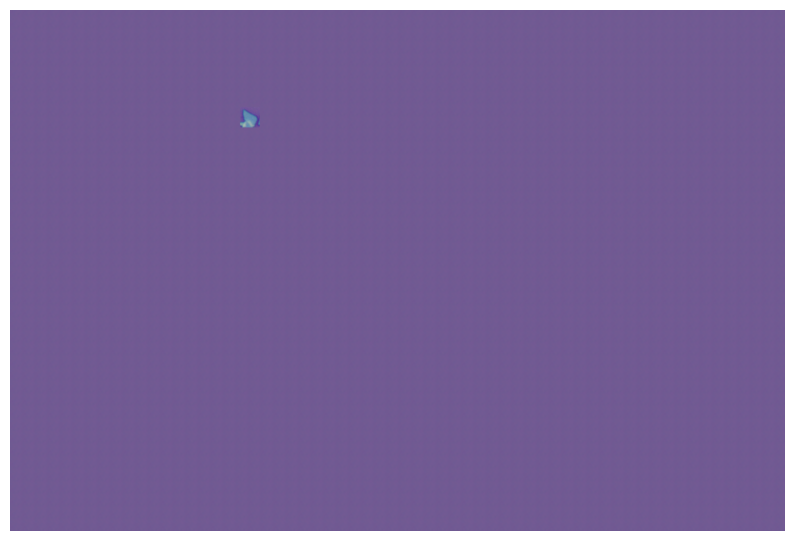

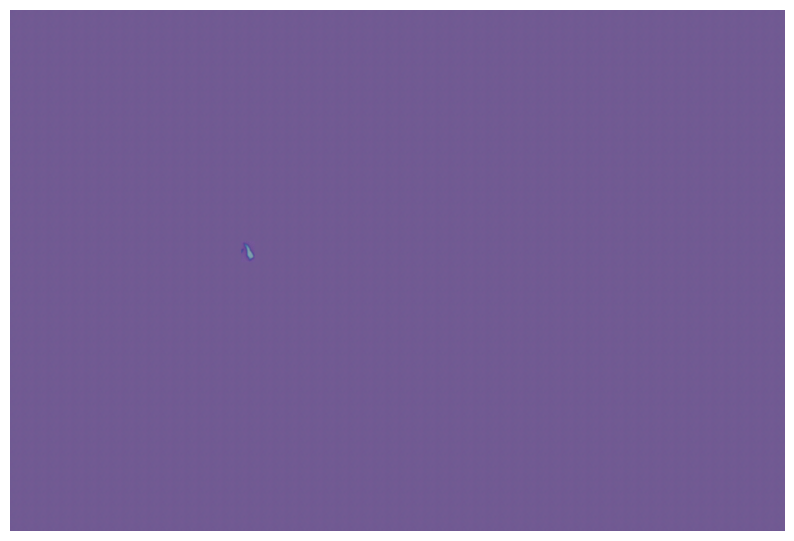

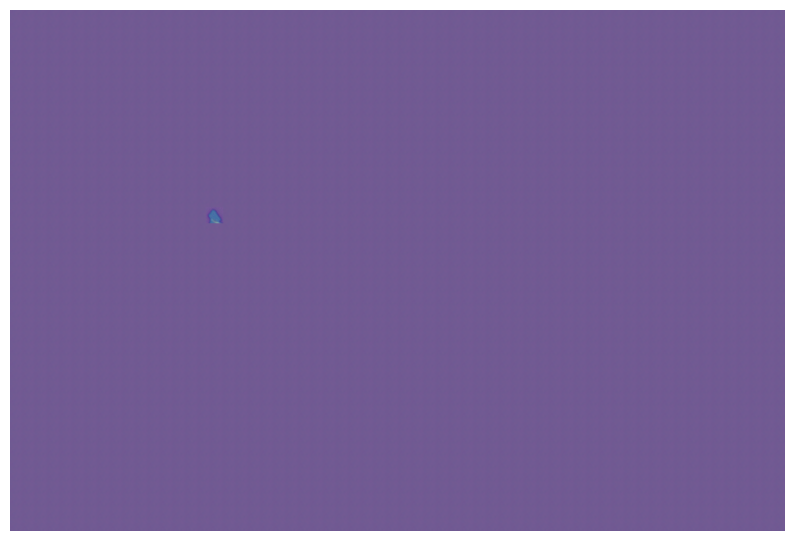

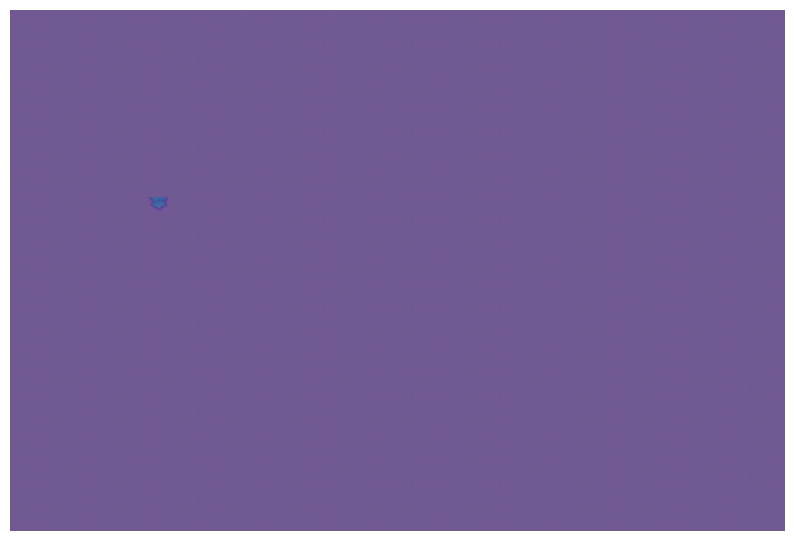

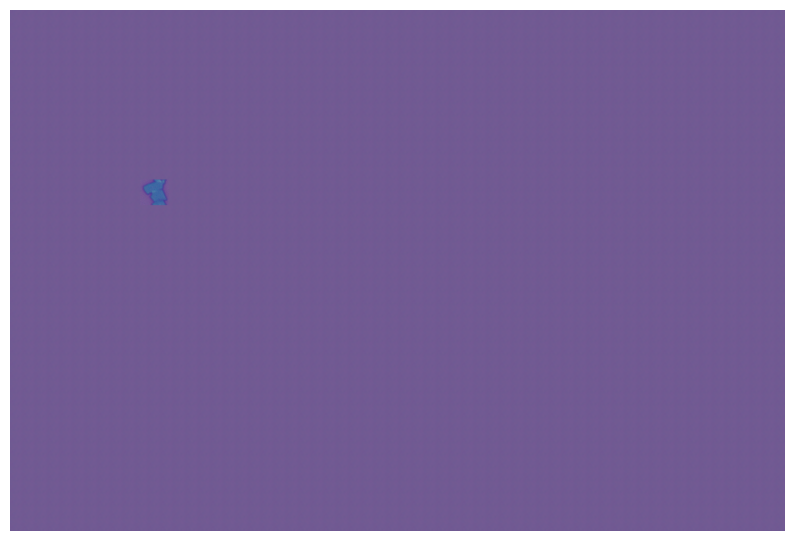

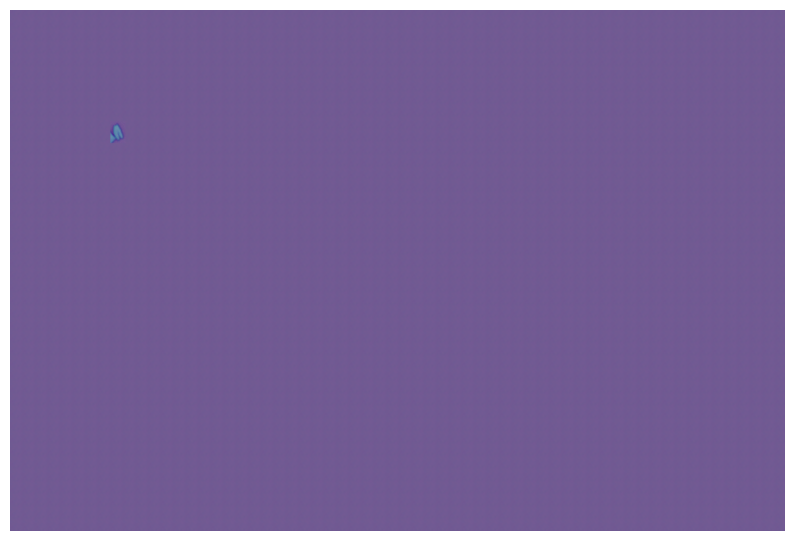

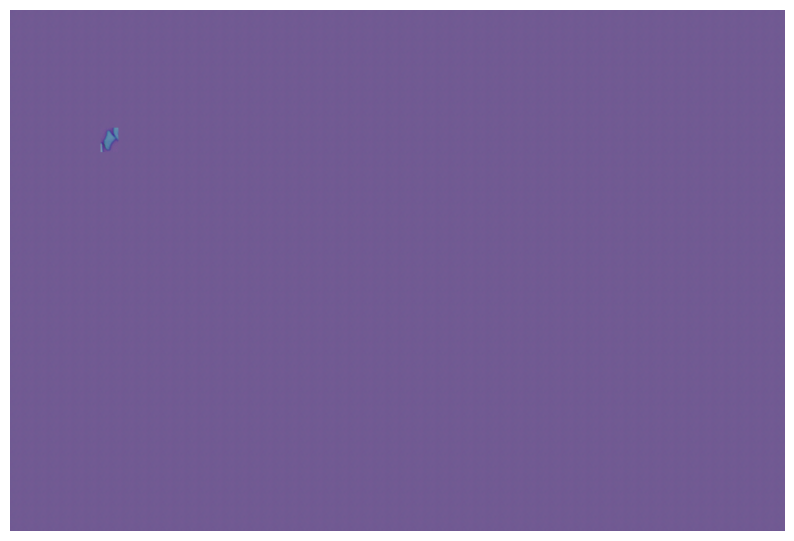

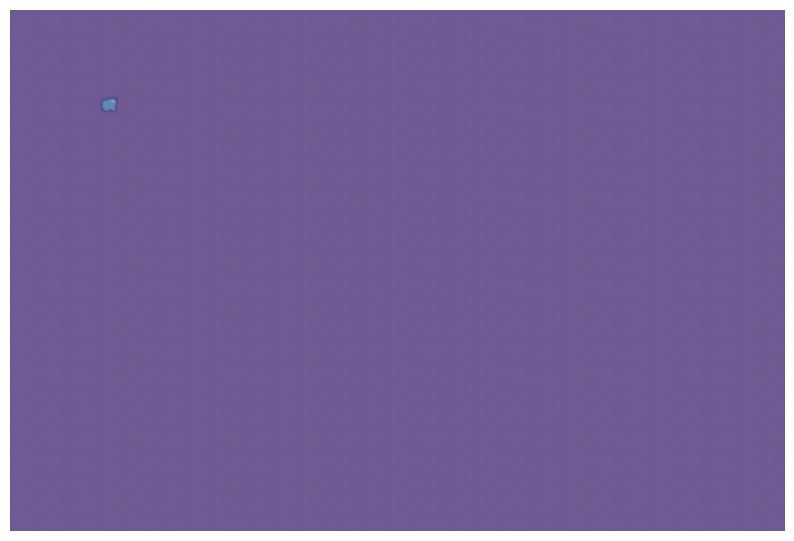

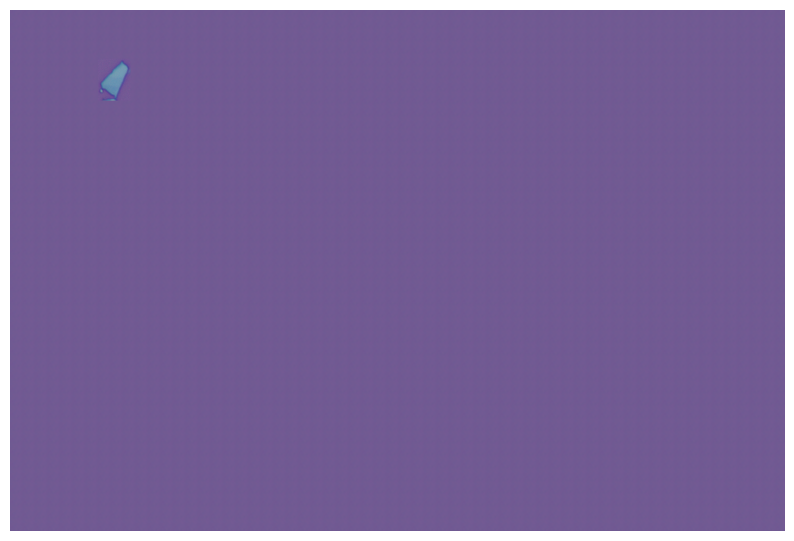

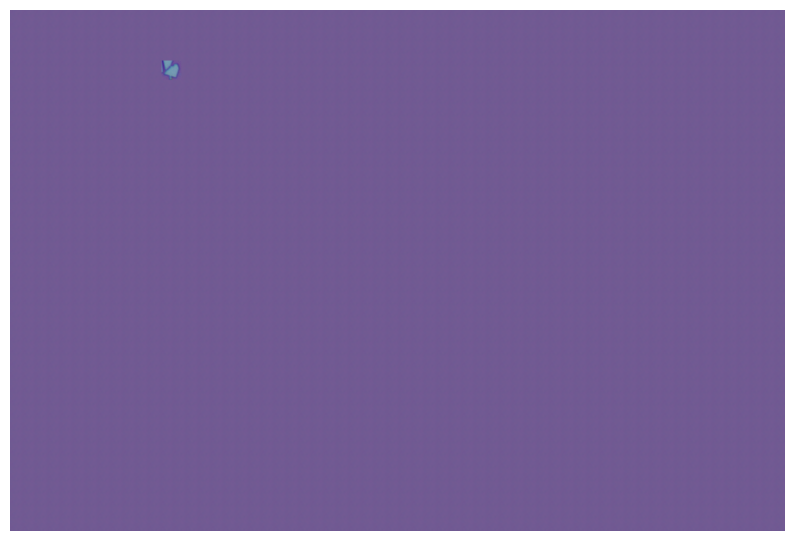

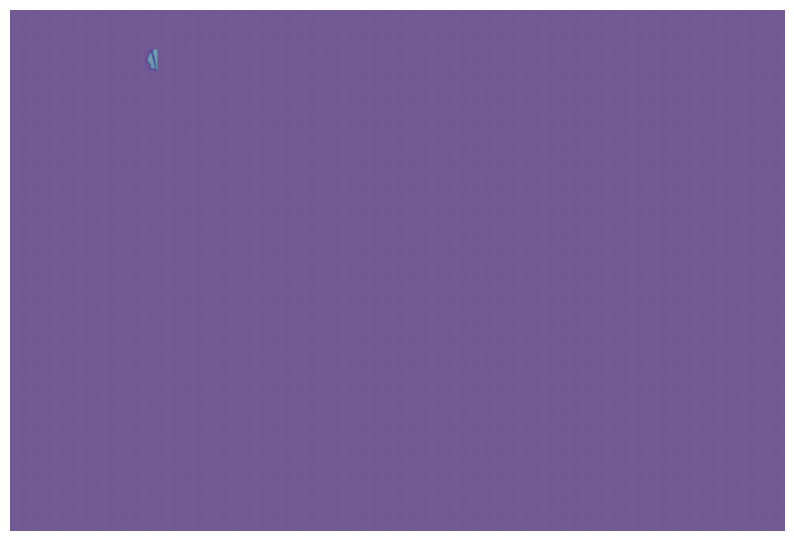

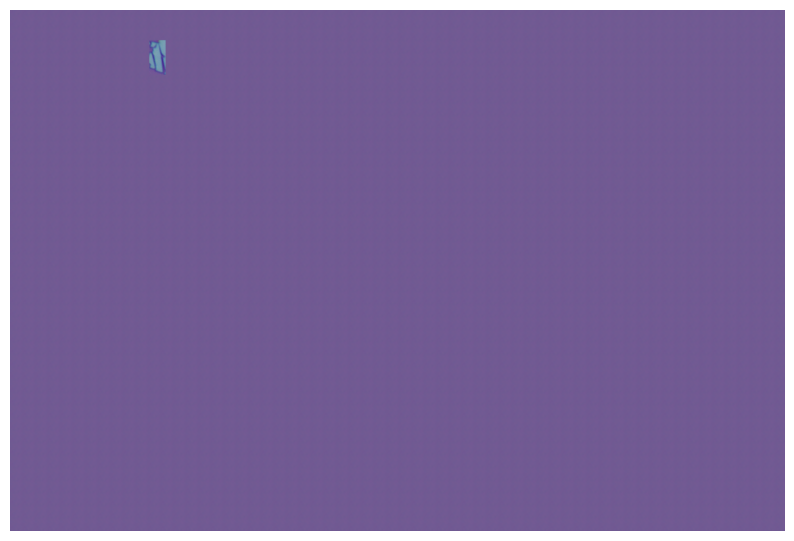

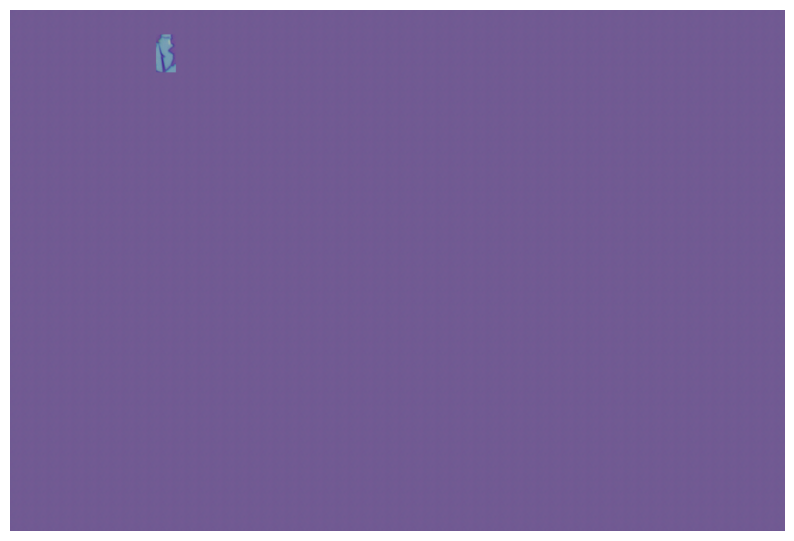

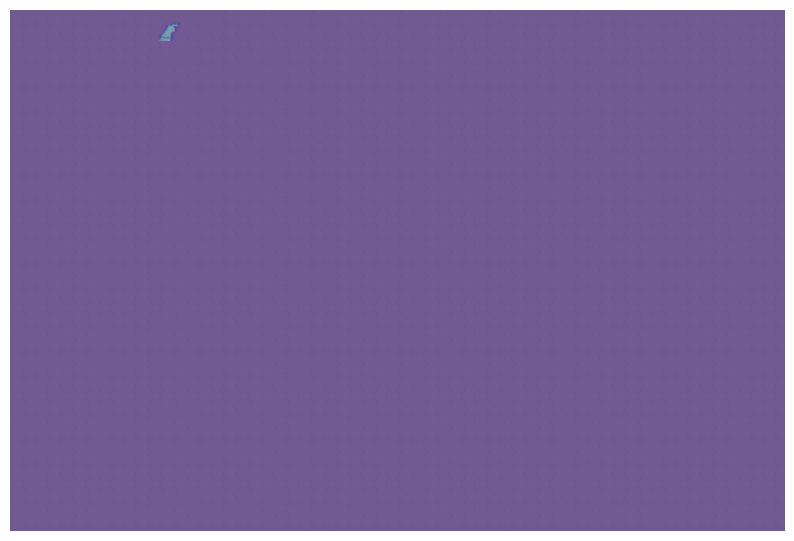

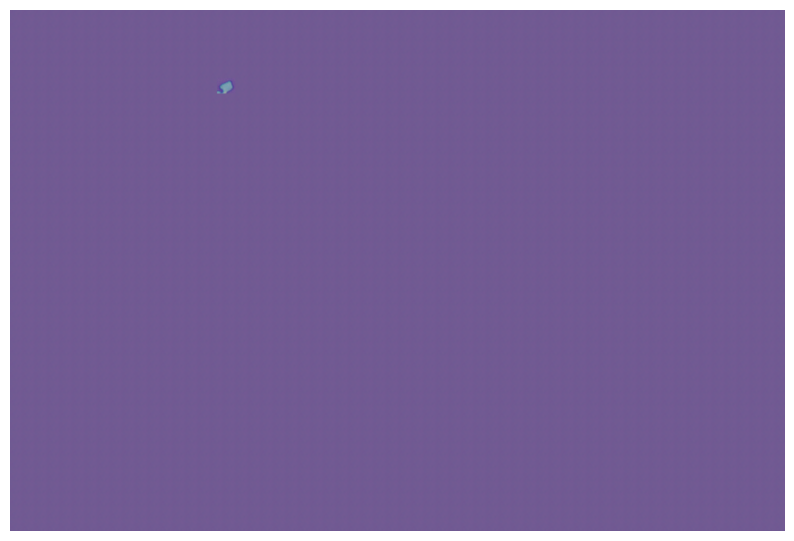

In [ ]:

annotations_file = os.path.join(ROOT_DIR, 'data', 'annotations', 'split.json')

if os.path.isfile(annotations_file):
    with open(annotations_file, 'r') as f:
        annotations_dict = json.loads(f)

with open(annotaions_file, 'w+') as f:
    json.dump(coco_format, f)

for idx, annotation in enumerate(data.image_info[image_id]['annotations']):
    bbox = annotation['bbox']
    x, y, w, h = [int(i) for i in bbox]

    area = w*h

    if area < threshold:
        continue

    flake_image = tiled_background.copy()
    flake_image = cv2.GaussianBlur(flake_image, (11, 11), 0)
    flake_image[y-border:y+h+border, x-border:x+w+border] = image[y-border:y+h+border, x-border:x+w+border]

    filename = data.image_info[image_id]['path'].split('\\')[-1].split('.')[0] + f'_split_{idx}' + '.png'

    plt.figure(figsize=(10, 10))
    plt.imshow(flake_image)
    plt.axis('off')  # Hide axis
    plt.show()

    cv2.imwrite(os.path.join(ROOT_DIR, 'data', 'images', 'split', filename), cv2.cvtColor(flake_image, cv2.COLOR_RGB2BGR))
